In [57]:
from typing import TypedDict

class PortfolioState(TypedDict):
    total_amount_usd: float
    total_inr: float
    total_usd: float

In [58]:
def calc_total_amount(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = float(state['total_amount_usd']*1.08)
    return state

In [59]:
def convert_total_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = float(state['total_usd']*85)
    return state

In [60]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioState)

builder.add_node('calc_total_node', calc_total_amount)
builder.add_node('convert_total_inr_node', convert_total_inr)

builder.add_edge(START, 'calc_total_node')
builder.add_edge('calc_total_node', 'convert_total_inr_node')
builder.add_edge('convert_total_inr_node', END)

graph = builder.compile()

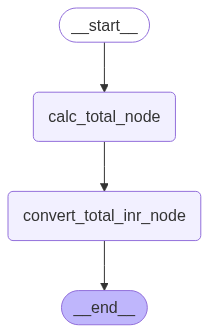

In [61]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [63]:
graph.invoke({"total_amount_usd": 100})

{'total_amount_usd': 100, 'total_inr': 9180.0, 'total_usd': 108.0}